# Cruise Control LiDAR Problem
In this problem, you have a lead vehicle and an ego vehicle. They are driving on a road and the ego vehicle needs to estimate the distance to the car in front of it. It had a noisy ranging sensor that returns 10 "pings" and the ego needs to estimate the distance to the car in front.

In [ ]:
# generate training data
# label: true distance to the car in front
# training data: noisy ranging sensor returns
n_train = 10000
n_meas = 10
X = []
Y = []
for i = 1:n_train
    y = rand()*100 # true distance in [0,100] meters
    # noisy measurements: Gaussian with occaisional multipath outliers
    x = randn(n_meas) .+ y
    if rand() < 0.2 # add an outlier to this batch of measurements 
        x[rand(1:n_meas)] *= 2
    end
    push!(X, x)
    push!(Y, y)
end
using Plots


In [ ]:
histogram(Y, size=(150,150))

In [ ]:
histogram(X[rand(1:n_train)], size=(150,150))

In [ ]:
X = hcat(X...)
println("shape of X is ", size(X))
Y = reshape(Y, 1, n_train)
println("shape of Y is ", size(Y))

# Train a neural network

In [ ]:
using Flux
import Flux: relu, Data.DataLoader, Losses.mse, ADAM, train!, Params, gradient, update!, logging_callback


In [ ]:
model = Chain(
    Dense(10, 10, relu),
    Dense(10, 10, relu),
    Dense(10, 1, relu))

In [ ]:
train_data = DataLoader(X, Y, batchsize=8, shuffle=true);

In [ ]:
loss(x,y) = mse(model(x), y)

In [57]:
opt = ADAM(0.0001)

ADAM(0.0001, (0.9, 0.999), IdDict{Any,Any}())

In [ ]:
local training_loss
ps = Params(model)
for d in train_data 
    gs = gradient(ps) do
        training_loss = loss(d...)
        return training_loss
    end
    logging_callback(training_loss)
    update!(opt, ps, gs)
end

In [ ]:
function loss_all(dataloader, model)
    l = 0f0
    for (x,y) in dataloader
        l += mse(model(x), y)
    end
    l/length(dataloader)
end
evalcb = () -> @show(loss_all(train_data, model))

In [59]:
# can call multiple times to
n_epochs = 5
for i = 1:n_epochs
    train!(loss, params(model), train_data, opt, cb=evalcb)
end

loss_all(train_data, model) = 0.16675152080061695
loss_all(train_data, model) = 0.16706095358409406
loss_all(train_data, model) = 0.16655305477178103
loss_all(train_data, model) = 0.16618132577781858
loss_all(train_data, model) = 0.16656256624328486
loss_all(train_data, model) = 0.16781563660222285
loss_all(train_data, model) = 0.17009468272328185
loss_all(train_data, model) = 0.1728974419860046
loss_all(train_data, model) = 0.17570372211166776
loss_all(train_data, model) = 0.17786601984479794
loss_all(train_data, model) = 0.17961749291338758
loss_all(train_data, model) = 0.17957853394898257
loss_all(train_data, model) = 0.18053404909485624
loss_all(train_data, model) = 0.18345837105313464
loss_all(train_data, model) = 0.1838005419086492
loss_all(train_data, model) = 0.18359634486543316
loss_all(train_data, model) = 0.1806550411464284
loss_all(train_data, model) = 0.17811471469565185
loss_all(train_data, model) = 0.174595190021005
loss_all(train_data, model) = 0.17253310253616033
loss_

loss_all(train_data, model) = 0.16758119136604877
loss_all(train_data, model) = 0.16816431759790895
loss_all(train_data, model) = 0.16880620840709917
loss_all(train_data, model) = 0.16962064341608832
loss_all(train_data, model) = 0.17052932403093643
loss_all(train_data, model) = 0.17117829251086286
loss_all(train_data, model) = 0.17217333032661955
loss_all(train_data, model) = 0.17311521805586888
loss_all(train_data, model) = 0.17454174633739847
loss_all(train_data, model) = 0.17564984534252445
loss_all(train_data, model) = 0.17369077547001985
loss_all(train_data, model) = 0.1705010563886681
loss_all(train_data, model) = 0.16840942098687467
loss_all(train_data, model) = 0.16755363196568512
loss_all(train_data, model) = 0.16738139610629088
loss_all(train_data, model) = 0.16735177499186393
loss_all(train_data, model) = 0.16733090199100997
loss_all(train_data, model) = 0.16727663703952625
loss_all(train_data, model) = 0.1670617030802385
loss_all(train_data, model) = 0.16643161908647577
lo

loss_all(train_data, model) = 0.16495175597738146
loss_all(train_data, model) = 0.1658774563940207
loss_all(train_data, model) = 0.1683563768031609
loss_all(train_data, model) = 0.17001321338716302
loss_all(train_data, model) = 0.17372673650304957
loss_all(train_data, model) = 0.17777387849510257
loss_all(train_data, model) = 0.18171071676078113
loss_all(train_data, model) = 0.18058476477103505
loss_all(train_data, model) = 0.17891681410534943
loss_all(train_data, model) = 0.1742656826041038
loss_all(train_data, model) = 0.17216824149096455
loss_all(train_data, model) = 0.17252246646084307
loss_all(train_data, model) = 0.1718012664080308
loss_all(train_data, model) = 0.17037468438063735
loss_all(train_data, model) = 0.1692430807504968
loss_all(train_data, model) = 0.16694723054349184
loss_all(train_data, model) = 0.1657231372800754
loss_all(train_data, model) = 0.16551017185197864
loss_all(train_data, model) = 0.16601747489025645
loss_all(train_data, model) = 0.16630305363603246
loss_a

loss_all(train_data, model) = 0.19909735327771114
loss_all(train_data, model) = 0.19575075189484964
loss_all(train_data, model) = 0.1909600557516814
loss_all(train_data, model) = 0.18171284328561074
loss_all(train_data, model) = 0.17501944804221808
loss_all(train_data, model) = 0.1715747708199098
loss_all(train_data, model) = 0.1723193148197102
loss_all(train_data, model) = 0.17832325026000737
loss_all(train_data, model) = 0.18941173212120943
loss_all(train_data, model) = 0.19702782886732428
loss_all(train_data, model) = 0.19802467532584636
loss_all(train_data, model) = 0.19455009040151297
loss_all(train_data, model) = 0.19229830315643265
loss_all(train_data, model) = 0.19026557478448264
loss_all(train_data, model) = 0.18610049732168651
loss_all(train_data, model) = 0.18189465787100004
loss_all(train_data, model) = 0.177130314302832
loss_all(train_data, model) = 0.17284398205947032
loss_all(train_data, model) = 0.17056958711891623
loss_all(train_data, model) = 0.17042817201179994
loss_

loss_all(train_data, model) = 0.1755695497630673
loss_all(train_data, model) = 0.18056744928294258
loss_all(train_data, model) = 0.1877162352626174
loss_all(train_data, model) = 0.19154416985926714
loss_all(train_data, model) = 0.19643866734422497
loss_all(train_data, model) = 0.19653664883804425
loss_all(train_data, model) = 0.1951238485995924
loss_all(train_data, model) = 0.19021434481958774
loss_all(train_data, model) = 0.18422127334610952
loss_all(train_data, model) = 0.17661966359830333
loss_all(train_data, model) = 0.1718116028760915
loss_all(train_data, model) = 0.16876919931454404
loss_all(train_data, model) = 0.16660812833755273
loss_all(train_data, model) = 0.1651661447138314
loss_all(train_data, model) = 0.16474210430037117
loss_all(train_data, model) = 0.16536349880786658
loss_all(train_data, model) = 0.16817457736231767
loss_all(train_data, model) = 0.17169751017752705
loss_all(train_data, model) = 0.17488435415151612
loss_all(train_data, model) = 0.17500646287982846
loss_

loss_all(train_data, model) = 0.16669684143396793
loss_all(train_data, model) = 0.1680002993846301
loss_all(train_data, model) = 0.16946076041775865
loss_all(train_data, model) = 0.17161127700922782
loss_all(train_data, model) = 0.17284744676372676
loss_all(train_data, model) = 0.17371028133131963
loss_all(train_data, model) = 0.17431908020800174
loss_all(train_data, model) = 0.17215522211927503
loss_all(train_data, model) = 0.16978369885089278
loss_all(train_data, model) = 0.1688471238614316
loss_all(train_data, model) = 0.16745082253832325
loss_all(train_data, model) = 0.16732623916418152
loss_all(train_data, model) = 0.1679228546535255
loss_all(train_data, model) = 0.16912316129029592
loss_all(train_data, model) = 0.17091332403961482
loss_all(train_data, model) = 0.17157686802720754
loss_all(train_data, model) = 0.17255668361061755
loss_all(train_data, model) = 0.17274671341841313
loss_all(train_data, model) = 0.17384109404408088
loss_all(train_data, model) = 0.17478280442921534
los

loss_all(train_data, model) = 0.1666402520647609
loss_all(train_data, model) = 0.16676462715178592
loss_all(train_data, model) = 0.16691676587050278
loss_all(train_data, model) = 0.16702801371250578
loss_all(train_data, model) = 0.16709029213547838
loss_all(train_data, model) = 0.16708529282664722
loss_all(train_data, model) = 0.1670715092653505
loss_all(train_data, model) = 0.16736182430286706
loss_all(train_data, model) = 0.16764611392166975
loss_all(train_data, model) = 0.16743723429311452
loss_all(train_data, model) = 0.16713517468880848
loss_all(train_data, model) = 0.1670464874965684
loss_all(train_data, model) = 0.16713931023418624
loss_all(train_data, model) = 0.16706700626915053
loss_all(train_data, model) = 0.16693656810761387
loss_all(train_data, model) = 0.16677535189977508
loss_all(train_data, model) = 0.16662539318766634
loss_all(train_data, model) = 0.16654606126242036
loss_all(train_data, model) = 0.16650290276070817
loss_all(train_data, model) = 0.16685877920259254
los

loss_all(train_data, model) = 0.17040986474355732
loss_all(train_data, model) = 0.17270472679845883
loss_all(train_data, model) = 0.17383825074160267
loss_all(train_data, model) = 0.1721313401004357
loss_all(train_data, model) = 0.16893008441793694
loss_all(train_data, model) = 0.16687861764347264
loss_all(train_data, model) = 0.16592531399636629
loss_all(train_data, model) = 0.16514335884849496
loss_all(train_data, model) = 0.16529275333170954
loss_all(train_data, model) = 0.16540469619115852
loss_all(train_data, model) = 0.16723326449367407
loss_all(train_data, model) = 0.17003332550706404
loss_all(train_data, model) = 0.17426997128765626
loss_all(train_data, model) = 0.1767574976783428
loss_all(train_data, model) = 0.18059448807641235
loss_all(train_data, model) = 0.18255151095308325
loss_all(train_data, model) = 0.185622520884953
loss_all(train_data, model) = 0.18839623564683802
loss_all(train_data, model) = 0.18582617158306045
loss_all(train_data, model) = 0.18342235315411612
loss

In [66]:
Ŷ = model(X)

1×10000 Array{Float32,2}:
 44.8018  92.7857  66.6154  48.4188  …  20.0109  51.4139  25.9684  69.7778

In [67]:
error = Y .- Ŷ

1×10000 Array{Float64,2}:
 -0.271517  -0.555517  -0.547793  0.130576  …  0.0959038  -0.0875074  0.20469

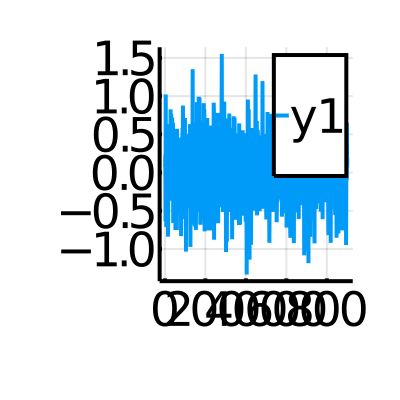

In [68]:
#Plots.scalefontsizes(1)
gr()
Plots.plot(error[100:1000], size=(100,100))

In [69]:
maximum(error)

1.7466639712164316

In [70]:
minimum(error)

-1.35417838700387

In [71]:
sum(abs.(error))/length(error)

0.3262935147358401

In [72]:
Plots.scalefontsizes(1)

# Next step: save training data and model

In [74]:
using BSON: @save
@save "lidar_model_1.bson" model

┌ Info: Precompiling BSON [fbb218c0-5317-5bc6-957e-2ee96dd4b1f0]
└ @ Base loading.jl:1260


In [75]:
@save "training_data.bson" X Y

In [76]:
# generate some test data too just in case
# generate training data
# label: true distance to the car in front
# training data: noisy ranging sensor returns
n_test = 300
X = []
Y = []
for i = 1:n_test
    y = rand()*100 # true distance in [0,100] meters
    # noisy measurements: Gaussian with occaisional multipath outliers
    x = randn(n_meas) .+ y
    if rand() < 0.2 # add an outlier to this batch of measurements 
        x[rand(1:n_meas)] *= 2
    end
    push!(X, x)
    push!(Y, y)
end
X = hcat(X...)
println("shape of X is ", size(X))
Y = reshape(Y, 1, n_test)
println("shape of Y is ", size(Y))

shape of X is (10, 300)
shape of Y is (1, 300)


In [77]:
@save "test_data.bson" X Y